# Factors Influencing ACT Scores

# Statistical Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
sns.set()
sns.set_context("notebook", font_scale=1.25)

In [2]:
# Setting options to display all column and row names
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [3]:
data = pd.read_csv('data.csv')

In [4]:
col = data.loc[: , 'AvgScrEng':'AvgScrSci']
data['AvgScr'] = col.mean(axis=1)

In [5]:
data.columns

Index(['Year', 'Sname', 'gsId', 'Dname', 'County', 'City', 'Lat', 'Lon',
       'Type', 'Enrollment', 'Enroll12', 'Percent Teachers InFirst SecondYear',
       'Plan504', 'FreeAnd Reduced PriceLunch', 'NumTstTakr', 'AvgScrEng',
       'AvgScrRead', 'AvgScrMath', 'AvgScrSci', 'NumGE21', 'PctGE21',
       'ActSat Number Participation', 'Asian', 'Black, non-Hispanic',
       'Hispanic', 'Multiracial', 'Native American or Native Alaskan',
       'Native Hawaiian or Other Pacific Islander', 'White, non-Hispanic',
       'gsRating', 'ParentRating', 'AvgScr'],
      dtype='object')

# 1. Checking The Normality of ACT Data

For the ACT data, my assumption was average scores were normally distributed and this stood correct by looking at the distribution plot of the data. Here, I am checking if this is also true statistically by comparing the ECDF of the data for average scores to the theoretical CDF of the Normal Distribution. To compute the theoretical CDF, I used np.random.normal with the mean and std of the data for average scores with a sample size 10000.

In [6]:
def ecdf(data):
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

In [7]:
mean = np.mean(data['AvgScr'])
std = np.std(data['AvgScr'])
# Drawing out of a normal distribution with parameters mean and std
samples = np.random.normal(mean, std, size=10000)
# Creating an ECDF from real data: x, y
x, y = ecdf(data['AvgScr'])
# Creating a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(samples)
print('Mean of the real data is {}'.format(mean))
print('Std of the real data is {}'.format(std))

Mean of the real data is 21.347439544807965
Std of the real data is 3.3829607252568934


In [8]:
mean

21.347439544807965

In [9]:
std

3.3829607252568934

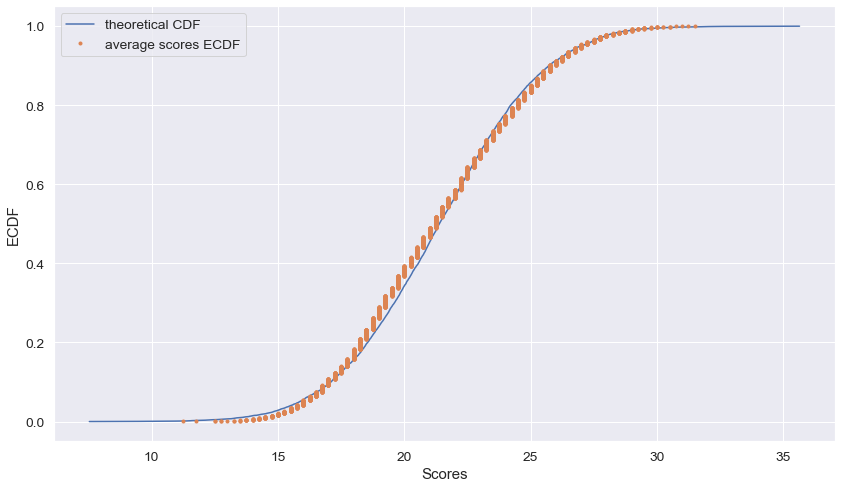

In [10]:
plt.figure(figsize=(14,8))
_ = plt.plot(x_theor, y_theor, label='theoretical CDF')
_ = plt.plot(x, y, marker='.', linestyle='none', label='average scores ECDF')
_ = plt.legend(loc='upper left')
_ = plt.xlabel('Scores')
_ = plt.ylabel('ECDF')
plt.show()

From the graph, we can conclude that the average scores of ACT data are approximately Normally distributed.

How do we know that mean and std of our data were appropriate values for the normal parameters?

## Generating a Bootstrap Sample

Generating a bootstrap sample and repeating the process 10000 times.

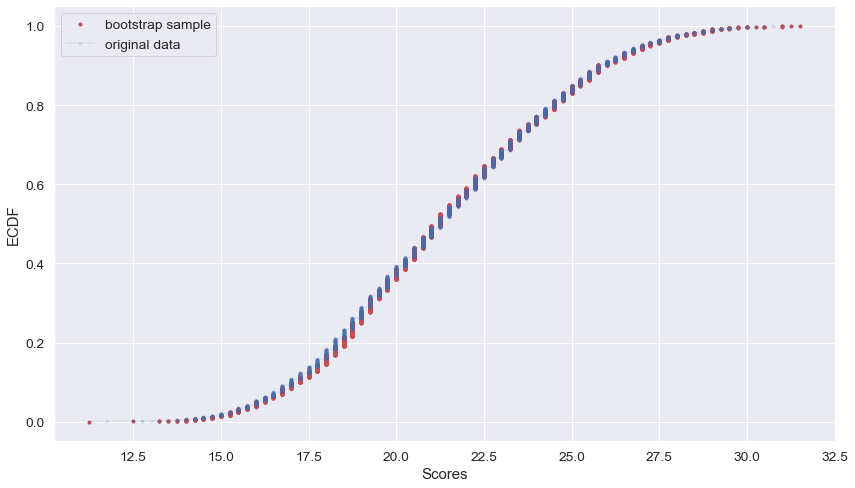

In [11]:
plt.figure(figsize=(14,8))
np.random.seed(47)

for _ in range(10000):
    # Generating bootstrap sample: bs_sample
    bs_sample = np.random.choice(data['AvgScr'], size = len(data['AvgScr']))

# Compute and plot ECDF from bootstrap sample
x, y = ecdf(bs_sample)
_ = plt.plot(x, y, marker='.', linestyle='none', color='r', label='bootstrap sample')

# Compute and plot ECDF from original data
x, y = ecdf(data['AvgScr'])
_ = plt.plot(x, y, marker='.', alpha=0.1, label='original data')

_ = plt.legend(loc='upper left')
_ = plt.xlabel('Scores')
_ = plt.ylabel('ECDF')
plt.show()

In [12]:
bs_sample = np.random.choice(data['AvgScr'], size = len(data['AvgScr']))

## Generating many bootstrap replicates

Using this bootstrap sample which is created by replacement technique, generating bootstrap replicates 10000 times to compute the mean.

In [13]:
np.mean(bs_sample)

21.326813655761026

In [14]:
np.std(bs_sample)

3.4455258326591367

In [15]:
def bootstrap_replicate(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate(data,func)

    return bs_replicates

Std of bootstrap replicates of means is 0.052176786686571566
Mean of bootstrap replicates = 21.351173541963014
95% confidence interval = [21.24406858 21.44808855]


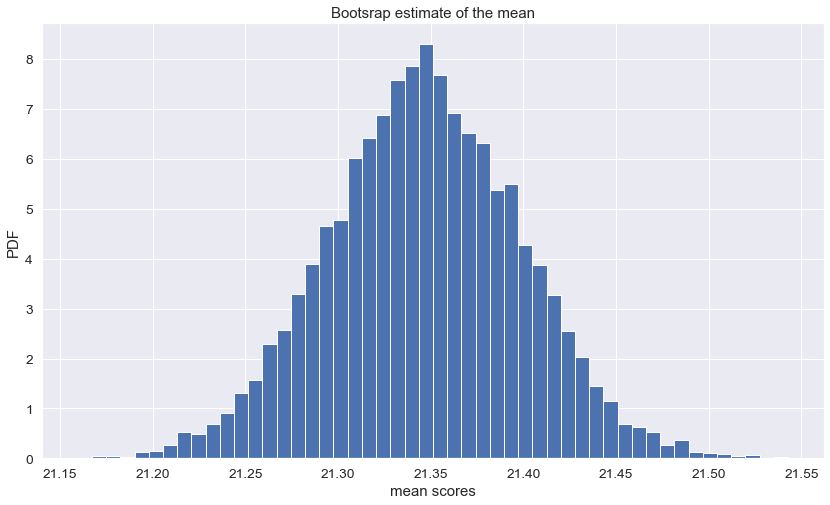

In [16]:
# Take 10,000 bootstrap replicates of the mean
bs_replicates = draw_bs_reps(data['AvgScr'],np.mean, 10000)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('Std of bootstrap replicates of means is {}'.format(bs_std))

# Make a histogram of the results
plt.figure(figsize=(14,8))
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.title('Bootsrap estimate of the mean')
_ = plt.xlabel('mean scores')
_ = plt.ylabel('PDF')

print('Mean of bootstrap replicates =', bootstrap_replicate(data['AvgScr'], np.mean))
conf_int = np.percentile(bs_replicates,[2.5,97.5])
print('95% confidence interval =', conf_int)

95% of the sample means would lie within the 95% confidence interval [ 21.24857604 21.44879386 ].

# 2. Hypothesis test of correlation

# Correlation Matrix

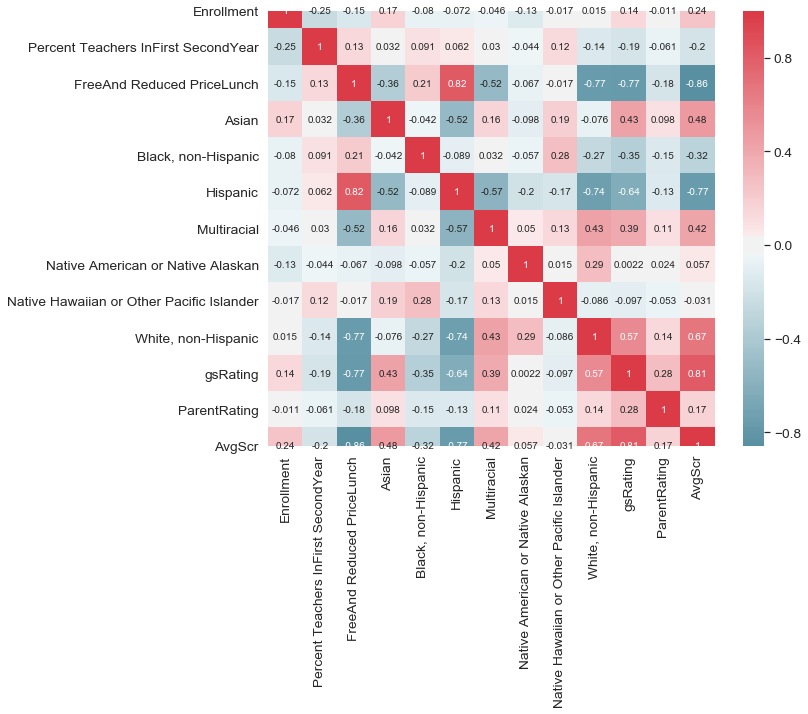

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
df = data.iloc[:,[8,9,11,13,22,23,24,25,26,27,28,29,30,31]]
corr = df.corr()
#Correlation Matrix
#corr = (corr)
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True), center=0, annot=True)

The observed correlation between some variables seem very strong. But this condition may just be by chance, those variables may actually be totally independent of eachother. So I am going to test this hyphothesis in the next section.

#  Pairs bootstrap for linear regression for highly correlated variables

In [18]:
def pearson_r(x, y):
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]

In [19]:
def linreg(x,y): 

    # Computing the linear regressions
    slope, intercept = np.polyfit(x,y,1)
    
    # Setting up array of indices to sample from: inds
    inds = np.arange(0,len(x))
    
    # Initializing replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(1000)
    bs_intercept_reps = np.empty(1000)

    # Generating replicates for slope and intercept
    for i in range(1000):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    # Showing the confidence interval for the replicates
    slope_conf_int = np.percentile(bs_slope_reps,[2.5, 97.5])
    intercept_conf_int = np.percentile(bs_intercept_reps,[2.5, 97.5])

    print('slope of original data =', slope)
    print('95% confidence interval of slope replicates =', slope_conf_int)
    print('intercept of original data =', intercept)
    print('95% confidence interval of intercept replicates =', intercept_conf_int)
    
    correlation = pearson_r(x, y)
    print('correlation for x and y is', correlation)

## Correlation between average scores and Hispanic students

<b>Null Hypothesis:</b> The average scores are totally independent of the number of Hispanic students.<br>
<b>Alternative Hypothesis:</b> The average scores are not totally independent of the number of Hispanic students.

In [20]:
x=np.array(data["Hispanic"])
y=np.array(data["AvgScr"])

# Calling the function
linreg(x,y)   

slope of original data = -0.09492562543045723
95% confidence interval of slope replicates = [-0.09723197 -0.09267134]
intercept of original data = 26.36371850640208
95% confidence interval of intercept replicates = [26.21101542 26.51844131]
correlation for x and y is -0.7676542660471057


The bootstrap replicates with a 95 % confidence interval indicate that the slope and intercept between the two groups have a 95 % chance of lying within <br> [ -0.09720368 -0.09239305 ] and [ 26.20255784 26.51325565 ].

## Correlation between percentage of low income and Hispanic students

<b>Null Hypothesis:</b> The percentage of low income students are totally independent of the number of Hispanic students.<br>
<b>Alternative Hypothesis:</b> The percentage of low income students are not totally independent of the number of Hispanic students.

In [21]:
x=np.array(data["Hispanic"])
y=np.array(data["FreeAnd Reduced PriceLunch"])

# Calling the function
linreg(x,y) 

slope of original data = 0.809226004597118
95% confidence interval of slope replicates = [0.7933374 0.8248742]
intercept of original data = 12.597244328538348
95% confidence interval of intercept replicates = [11.51131218 13.719342  ]
correlation for x and y is 0.8249667446279654


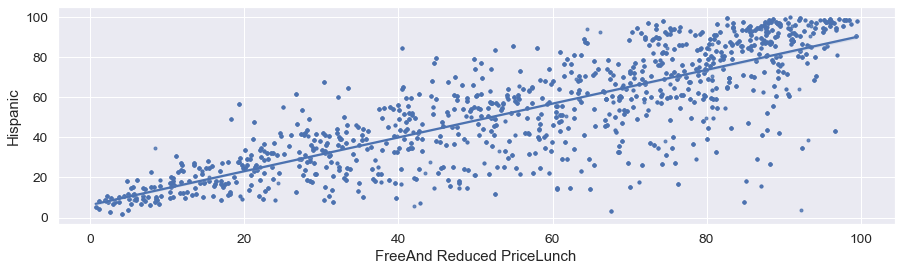

In [22]:
plt.figure(figsize=(15,4))
_ = sns.regplot(y=data["Hispanic"], x=data["FreeAnd Reduced PriceLunch"], marker=".", color='b',
                 truncate=True, line_kws={"color": "b"})

## Correlation between average scores and White-non Hispanic students

<b>Null Hypothesis:</b> The average scores are totally independent of the number of White-non Hispanic students.<br>
<b>Alternative Hypothesis:</b> The average scores are not totally independent of the number of White-non Hispanic students.

In [23]:
x=np.array(data["White, non-Hispanic"])
y=np.array(data["AvgScr"])

# Calling the function
linreg(x,y)  

slope of original data = 0.10187919797540322
95% confidence interval of slope replicates = [0.09900614 0.10519674]
intercept of original data = 18.87775518351414
95% confidence interval of intercept replicates = [18.76642025 18.98418596]
correlation for x and y is 0.670447304090148


The bootstrap replicates with a 95 % confidence interval indicate that the slope and intercept between the two groups have a 95 % chance of lying within <br> [ 0.09900614 0.10519674 ] and [ 18.76642025 18.98418596 ].

## Correlation between percentage of low income and White non-Hispanic students

<b>Null Hypothesis:</b> The percentage of low income students are totally independent of the number of White-non Hispanic students.<br>
<b>Alternative Hypothesis:</b> The percentage of low income students are not totally independent of the number of White-non Hispanic students.

In [24]:
x=np.array(data["White, non-Hispanic"])
y=np.array(data["FreeAnd Reduced PriceLunch"])

# Calling the function
linreg(x,y) 

slope of original data = -0.9276378513864167
95% confidence interval of slope replicates = [-0.95075841 -0.9049626 ]
intercept of original data = 77.8473812359102
95% confidence interval of intercept replicates = [77.09052245 78.58692088]
correlation for x and y is -0.7695591454721741


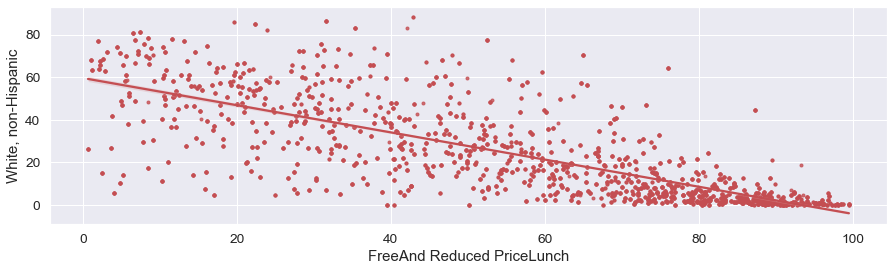

In [25]:
plt.figure(figsize=(15,4))
_ = sns.regplot(y=data["White, non-Hispanic"], x=data["FreeAnd Reduced PriceLunch"], marker=".", color='r',
                 truncate=True, line_kws={"color": "r"})

## Correlation between average scores and low income students

<b>Null Hypothesis:</b> The average scores are totally independent of the number of low income students.<br>
<b>Alternative Hypothesis:</b> The average scores are not totally independent of the number of low income students.

In [26]:
x=np.array(data["FreeAnd Reduced PriceLunch"])
y=np.array(data["AvgScr"])

# Calling the function
linreg(x,y)  

slope of original data = -0.10809660036273021
95% confidence interval of slope replicates = [-0.10974897 -0.10615364]
intercept of original data = 27.33169245579348
95% confidence interval of intercept replicates = [27.21695073 27.43469222]
correlation for x and y is -0.857487157900884


The bootstrap replicates with a 95 % confidence interval indicate that the slope and intercept between the two groups have a 95 % chance of lying within <br> [ -0.10996054 -0.10618294 ] and [ 27.21568846 27.44642057 ].
 

# 3. Hypothesis test for mean difference

#  Parameter estimates of mean difference

Estimating the difference of the mean of the scores samples from 2014 and 2018 and reporting a 95% confidence interval.

In [27]:
def function1(df1,df2):
    obs_mean = np.mean(df1) - np.mean(df2)

    # Get bootstrap replicates of means
    bs_replicates_df1 = draw_bs_reps(df1,np.mean,10000)
    bs_replicates_df2 = draw_bs_reps(df2,np.mean,10000)

    # Compute samples of difference of means: bs_diff_replicates
    bs_diff_replicates = bs_replicates_df1 - bs_replicates_df2

    # Compute 95% confidence interval: conf_int
    conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])

    print('difference of means =', obs_mean)
    print('95% confidence interval =', conf_int)
    plt.hist(bs_diff_replicates, bins=25)
    plt.title('Differences of means')

But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean scores if the means were the same? The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [28]:
def function2(df1,df2):
    
    # Converting the columns to numpy arrays and changing their types to integers
    df1=np.array(df1)
    df2=np.array(df2)
    df1=df1.astype(int)
    df2=df2.astype(int)
    
    obs_mean = np.mean(df1) - np.mean(df2)
    # Compute mean of combined data set: combined_mean
    combined_mean = np.mean(np.concatenate((df1,df2)))

    # Shift the samples
    df1_shifted = df1 - np.mean(df1) + combined_mean
    df2_shifted = df2 - np.mean(df2) + combined_mean

    # Get bootstrap replicates of shifted data sets
    bs_replicates_df1 = draw_bs_reps(df1_shifted,np.mean,10000)
    bs_replicates_df2 = draw_bs_reps(df2_shifted,np.mean,10000)

    # Compute replicates of difference of means: bs_diff_replicates
    bs_diff_replicates = bs_replicates_df1 - bs_replicates_df2

    # Compute the p-value
    p = np.sum(bs_diff_replicates >= abs(obs_mean)) / len(bs_diff_replicates)

    conf_int = np.percentile(bs_diff_replicates,[2.5, 97.5])

    # Print p-value
    print('p-value =', p)
    print('95% confidence interval =', conf_int)

In [29]:
df1 = data[data['Year'] == 2014]
df2 = data[data['Year'] == 2018]

## Average English Scores in 2014 and 2018

<b>Null Hypothesis:</b> There is no difference in average English scores in 2014 and 2018.<br>
<b>Alternative Hypothesis :</b> There is a difference in average English scores in 2014 and 2018.</b>

difference of means = -0.49767503556685355
95% confidence interval = [-0.87644556 -0.1272882 ]


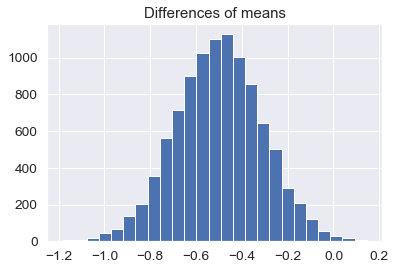

In [30]:
# Calling the function1
function1(df1['AvgScrEng'],df2['AvgScrEng'])

In [31]:
# Calling the function2
function2(df1['AvgScrEng'],df2['AvgScrEng'])

p-value = 0.0056
95% confidence interval = [-0.37348291  0.38352234]


Since p-value is less than 0.05, we reject the null hyphothesis.

## Average Reading Scores in 2014 and 2018

<b>Null Hypothesis:</b> There is no difference in average Reading scores in 2014 and 2018.<br>
<b>Alternative Hypothesis :</b> There is a difference in average Reading scores in 2014 and 2018.</b>

difference of means = -0.5254827763136412
95% confidence interval = [-0.85560222 -0.19612372]


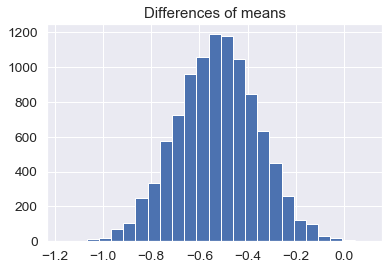

In [32]:
# Calling the function1
function1(df1['AvgScrRead'],df2['AvgScrRead'])

In [33]:
# Calling the function2
function2(df1['AvgScrRead'],df2['AvgScrRead'])

p-value = 0.0007
95% confidence interval = [-0.33798507  0.33348805]


Since p-value is less than 0.05, we reject the null hyphothesis.

## Average Math Scores in 2014 and 2018

<b>Null Hypothesis:</b> There is no difference in average Math scores in 2014 and 2018.<br>
<b>Alternative Hypothesis :</b> There is a difference in average Math scores in 2014 and 2018.</b>

difference of means = 0.47668476106070656
95% confidence interval = [0.16001735 0.79457409]


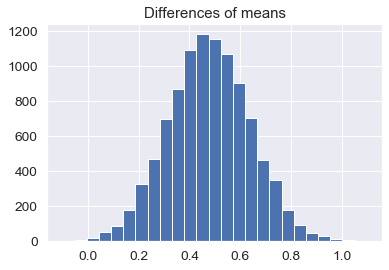

In [34]:
# Calling the function1
function1(df1['AvgScrMath'],df2['AvgScrMath'])

In [35]:
# Calling the function2
function2(df1['AvgScrMath'],df2['AvgScrMath'])

p-value = 0.0015
95% confidence interval = [-0.30915271  0.3134821 ]


Since p-value is less than 0.05, we reject the null hyphothesis.

## Average Science Scores in 2014 and 2018

<b>Null Hypothesis:</b> There is no difference in average Science scores in 2014 and 2018.<br>
<b>Alternative Hypothesis :</b> There is a difference in average Science scores in 2014 and 2018.</b>

difference of means = -0.265302493178158
95% confidence interval = [-0.56411738  0.03576539]


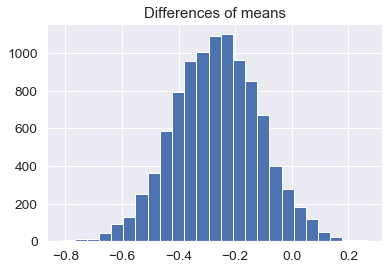

In [36]:
# Calling the function1
function1(df1['AvgScrSci'],df2['AvgScrSci'])

In [37]:
# Calling the function2
function2(df1['AvgScrSci'],df2['AvgScrSci'])

p-value = 0.0393
95% confidence interval = [-0.29494251  0.29624824]


Since p-value is less than 0.05, we reject the null hyphothesis.

## Overall Mean Scores in 2014 and 2018

<b>Null Hypothesis:</b> There is no difference in overall mean scores in 2014 and 2018.<br>
<b>Alternative Hypothesis :</b> There is a difference in overall mean scores in 2014 and 2018.</b>

difference of means = -0.20294388599948832
95% confidence interval = [-0.53543512  0.12765353]


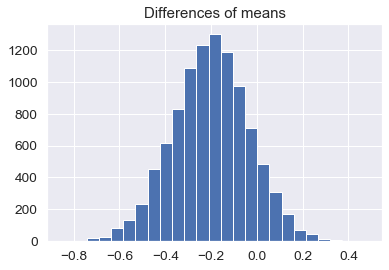

In [38]:
# Calling the function1
function1(df1['AvgScr'],df2['AvgScr'])

In [39]:
# Calling the function2
function2(df1['AvgScr'],df2['AvgScr'])

p-value = 0.1292
95% confidence interval = [-0.32043327  0.32727595]


Since p-value is less than 0.05, we reject the null hyphothesis.